# Content-based filtering. 
## introduction :
### Content-based filtering methods are based on a description of the item and a profile of the user's preferences.
### These methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user.

### Content-based recommenders treat recommendation as a user-specific classification problem and learn a classifier for the user's likes and dislikes based on product features.

In [1]:
# import libraries 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set(font_scale=1)
%config InlineBackend.figure_format = 'retina'

# set display rows to 1000
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

# 1) cleaning data 

In [2]:
# merging some coulmns of summary data frame into df
df= pd.read_csv('/Users/faisalshuraym/Desktop/Data_Scince_GA/Capstone/song_data.csv')

In [3]:
# droping 'liveness', 'audio_mode'. 
df.drop(['liveness', 'audio_mode'], axis=1, inplace= True)

In [4]:
# convert ms to mintues
df['song_duration_ms']= df['song_duration_ms'].apply(lambda x: x /100000)

In [5]:
# rename song_duration_ms to song_duration  
df.rename(columns={'song_duration_ms':'song_duration',}, 
                 inplace=True)

In [6]:
# displayig the data 
df.head()

,song_name,song_popularity,song_duration,acousticness,danceability,energy,instrumentalness,key,loudness,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,2.62333,0.005520,0.496,0.682,0.000029,8,-4.095,0.0294,167.060,4,0.474
1,In The End,66,2.16933,0.010300,0.542,0.853,0.000000,3,-6.407,0.0498,105.256,4,0.370
2,Seven Nation Army,76,2.31733,0.008170,0.737,0.463,0.447000,0,-7.828,0.0792,123.881,4,0.324
3,By The Way,74,2.16933,0.026400,0.451,0.970,0.003550,0,-4.938,0.1070,122.444,4,0.198
4,How You Remind Me,56,2.23826,0.000954,0.447,0.766,0.000000,10,-5.065,0.0313,172.011,4,0.574


# Visualization

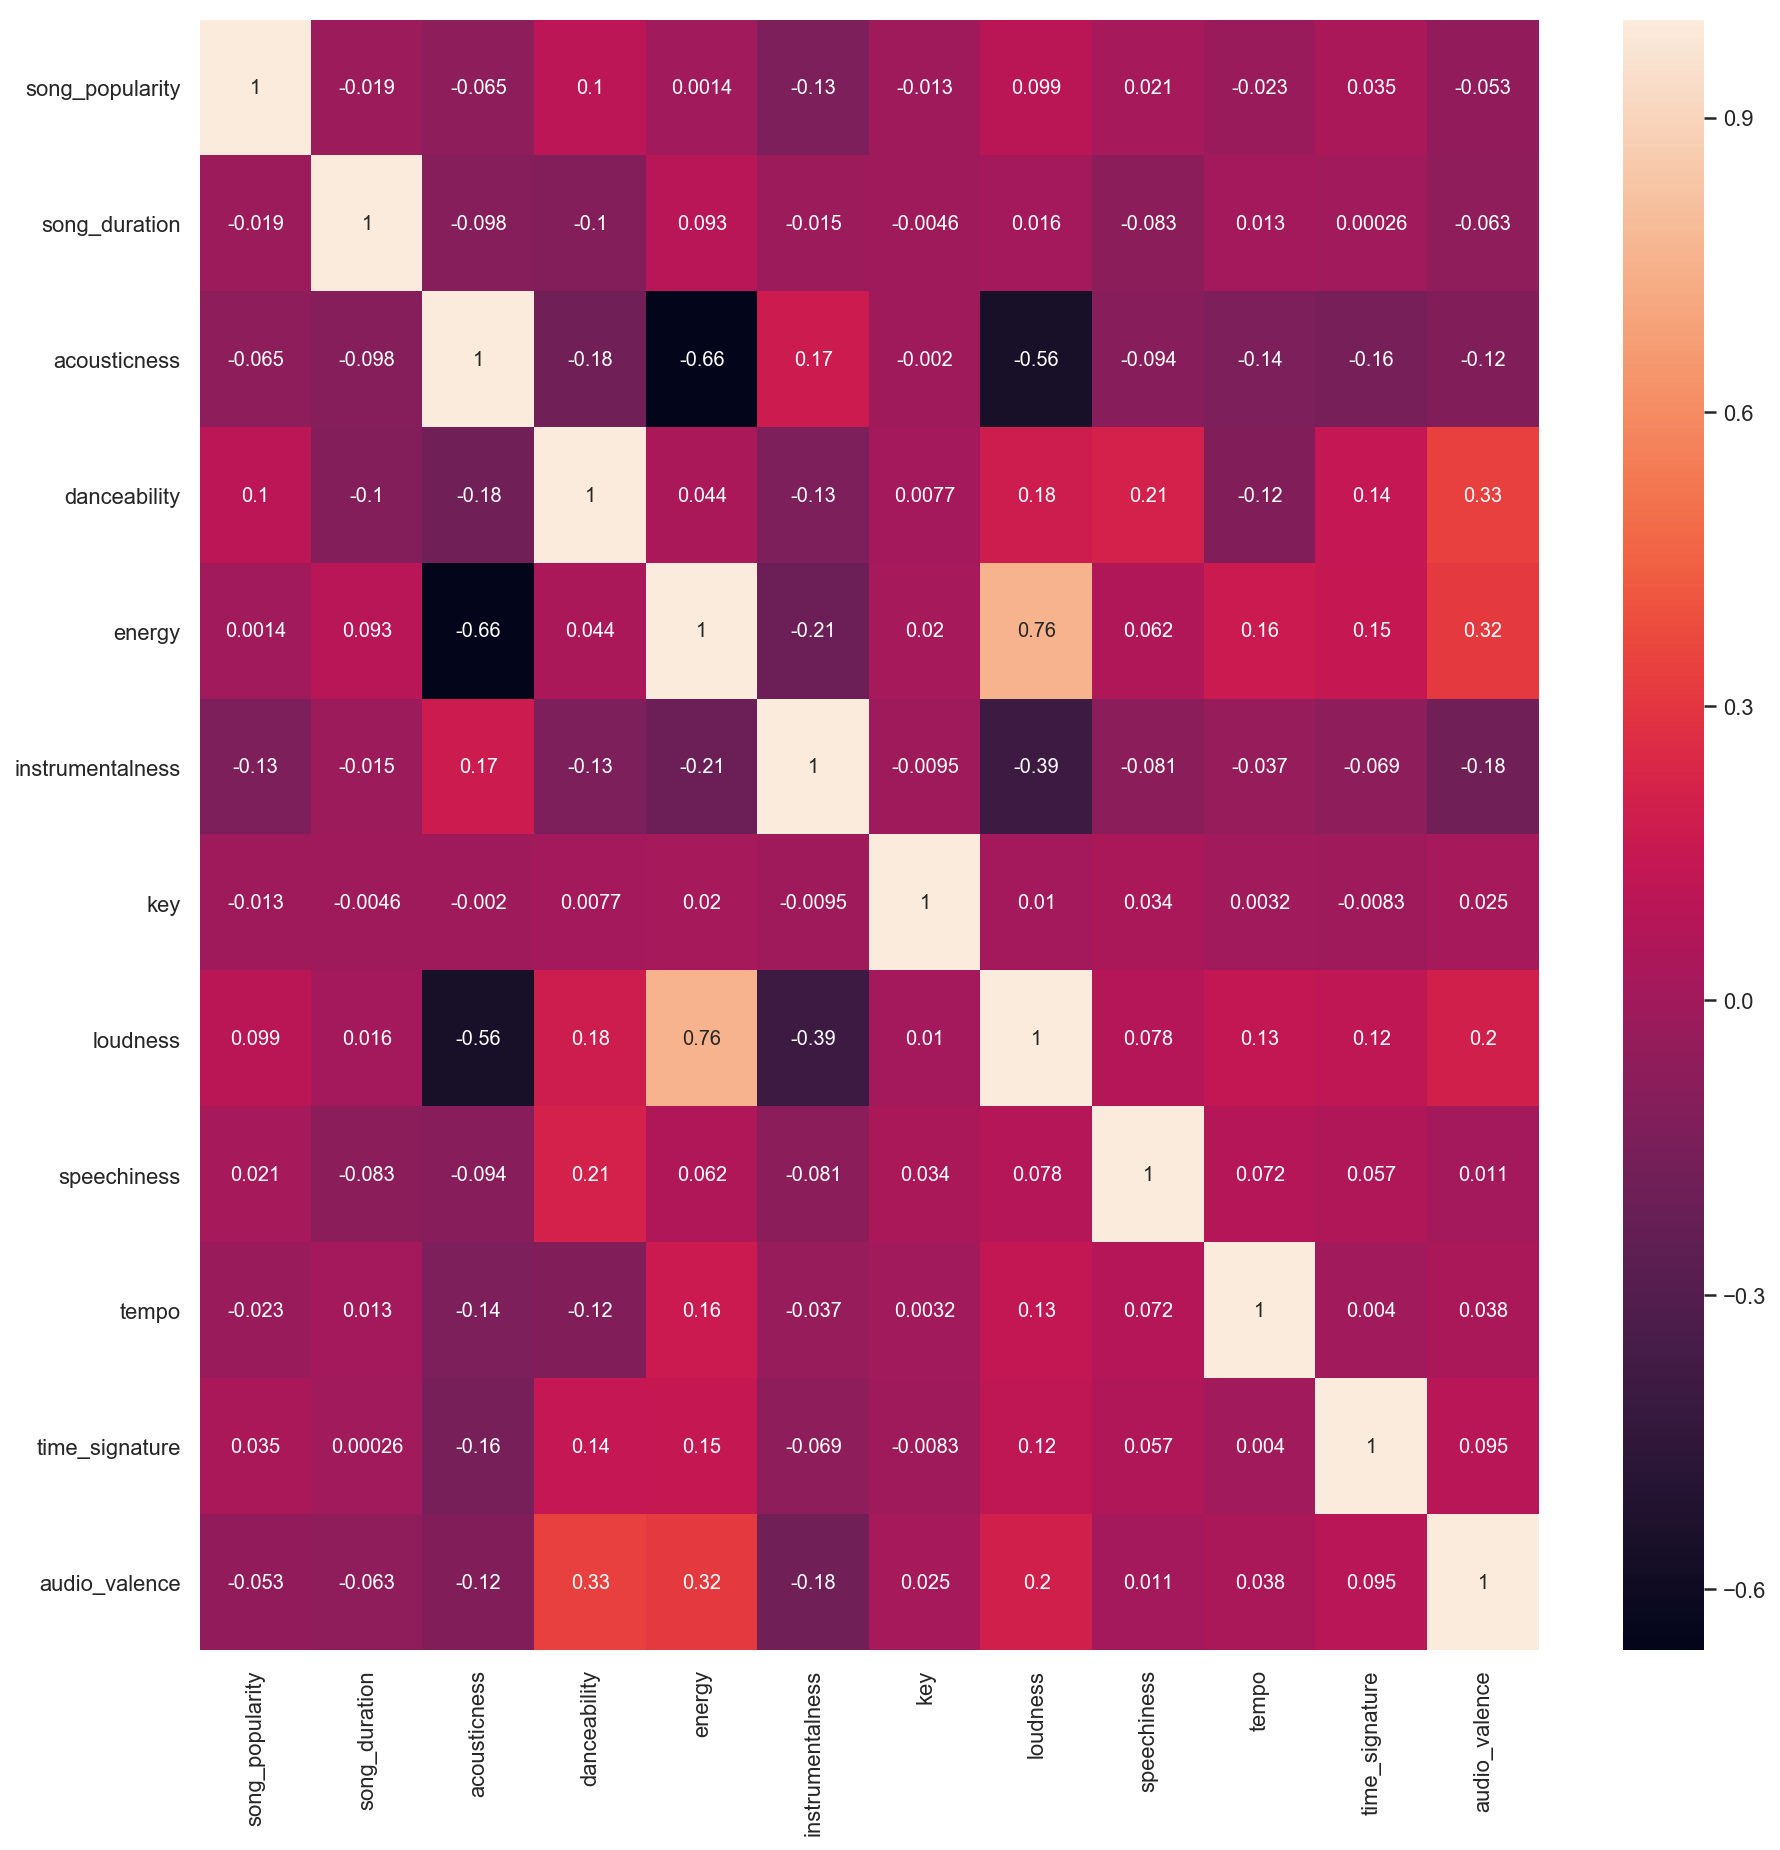

In [7]:
# coleration heat map 
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr,  annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25a86ef0>,
      dtype=object)

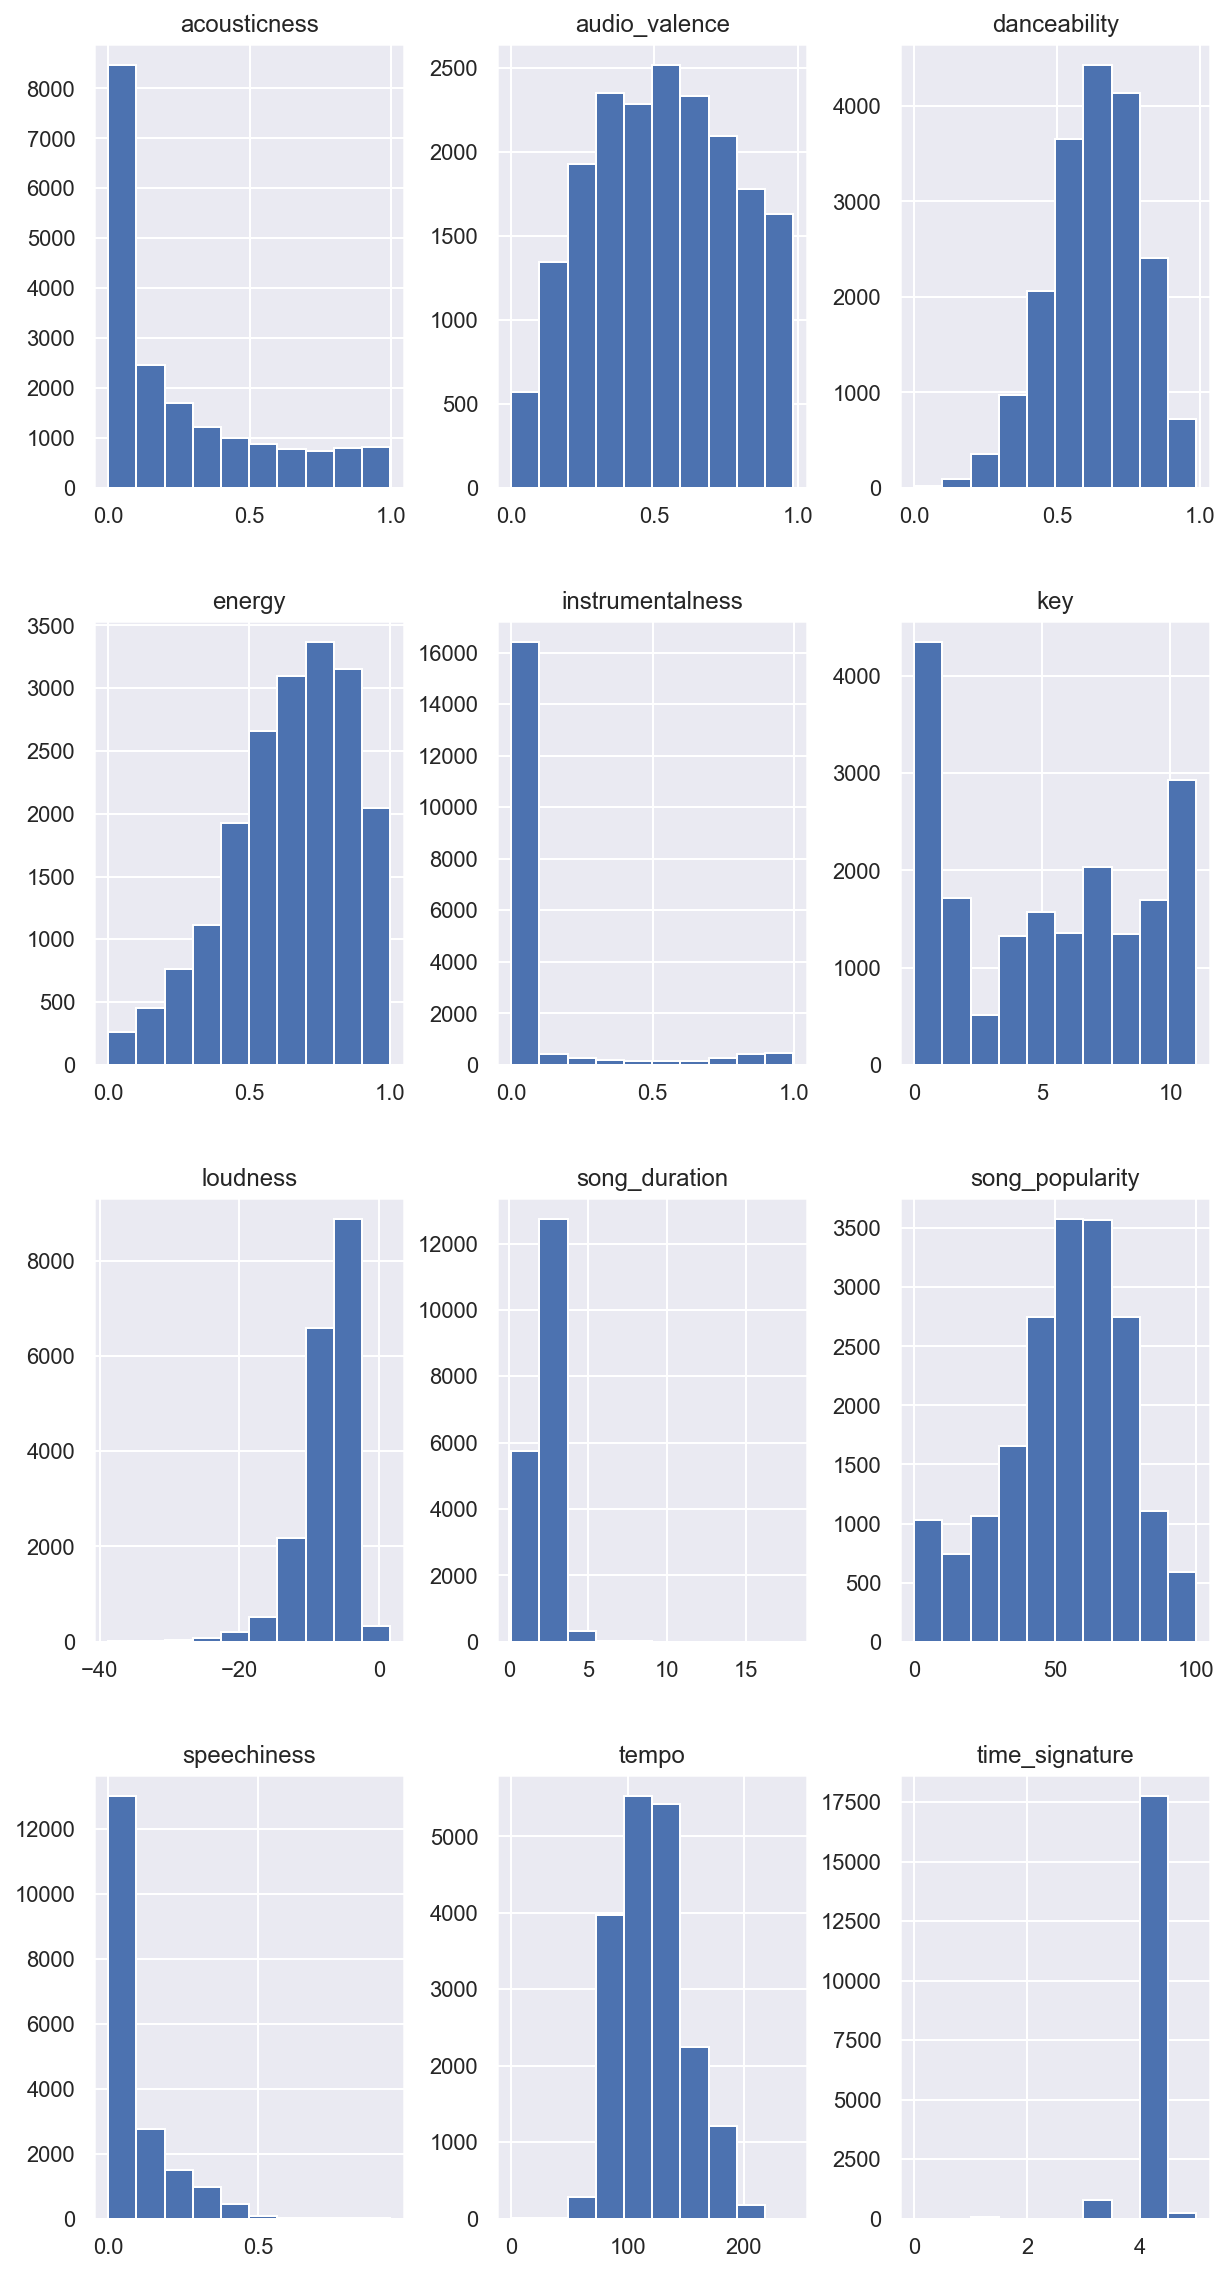

In [8]:
# checking distribtioin of data
df.hist(figsize=(10,20))

# 2) Content Based recommnder system 

In [9]:
# import libries 
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer 

In [10]:
# Converting to vectorization  
music_tfidf = TfidfVectorizer(stop_words='english')

In [11]:
# droping duplicates of song_name 
df.drop_duplicates(subset='song_name',inplace =True)

In [12]:
# fit and transform song_name 
music_description_matrix = music_tfidf.fit_transform(df['song_name'],df['tempo'])

In [13]:
# music_description_matrix
music_description_matrix

<13070x9351 sparse matrix of type '<class 'numpy.float64'>'
	with 28215 stored elements in Compressed Sparse Row format>

In [14]:
# using linear_kernel  from sklearn.metrics.pairwise import linear_kernel
cosine_similarity = linear_kernel(music_description_matrix, music_description_matrix)

In [15]:
# using 'song name as indices'
indices = pd.Series(df['song_name'].index)

In [16]:
# function that print links from google search 
# tld stands for top level domain which means we want to search our result on google.com or google.in or some other domain.
# num : Number of results we want.
# stop : Last result to retrieve. Use None to keep searching forever.
# pause : Lapse to wait between HTTP requests. Lapse too short may cause Google to block your IP. Keeping significant lapse will make your program slow but its safe and better option.

def link_print(song):
    try: 
        # google search 
        from googlesearch import search 
    except ImportError:  
            print("No module named 'google' found") 
    for j in search(song + "youtube", tld="co.in", num=10, stop=1, pause=2): 
        print(j)
        return j

In [17]:
def recommend(index, cosine_sim=cosine_similarity):
    id = indices[index]
    
    # Get the pairwsie similarity scores of all songs 
    # sorting them and getting top 5
    
    similarity_scores = list(enumerate(cosine_sim[id]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:6]

    # Get the music index
    music_index = [i[0] for i in similarity_scores] 

    songs = []
    links = []
    # Return the top 5 most similar music using integer-location based indexing (iloc)
    for song in df['song_name'].iloc[music_index]:
        songs.append(song)
        print(song)
        link = link_print(song)
        links.append(link)
        
    return songs, links

In [18]:
# underneath is a function call where it selects top 5 most similar music using integer-location based indexing (iloc)

In [19]:
recommend(200)

Boulevard of Broken Dreams
https://www.youtube.com/watch?v=Soa3gO7tL-c
In The End
https://www.youtube.com/watch?v=eVTXPUF4Oz4
Seven Nation Army
https://www.youtube.com/watch?v=0J2QdDbelmY
By The Way
https://www.youtube.com/watch?v=ePj2GFS65RM
How You Remind Me
https://www.youtube.com/watch?v=1cQh1ccqu8M


(['Boulevard of Broken Dreams',
  'In The End',
  'Seven Nation Army',
  'By The Way',
  'How You Remind Me'],
 ['https://www.youtube.com/watch?v=Soa3gO7tL-c',
  'https://www.youtube.com/watch?v=eVTXPUF4Oz4',
  'https://www.youtube.com/watch?v=0J2QdDbelmY',
  'https://www.youtube.com/watch?v=ePj2GFS65RM',
  'https://www.youtube.com/watch?v=1cQh1ccqu8M'])

In [20]:
# accessing the actual song in df dataframe 
df.iloc[200]

song_name           La Camisa Negra
song_popularity                  29
song_duration               2.16706
acousticness                 0.0838
danceability                  0.751
energy                        0.731
instrumentalness                  0
key                               6
loudness                     -4.419
speechiness                  0.0308
tempo                        97.007
time_signature                    4
audio_valence                 0.973
Name: 202, dtype: object

In [21]:
# libraries import
from flask import Flask, redirect, url_for, request, render_template, session, flash
import os
import requests
import uuid
import random


# App Declaration
app = Flask(__name__)
app.secret_key = 'Rjkxujeq85WiDmXRATwM'
# from flask_ngrok import run_with_ngrok
# run_with_ngrok(app)


#app routes 
@app.after_request
def add_header(response):
    response.headers['X-UA-Compatible'] = 'IE=Edge,chrome=1'
    response.headers['Cache-Control'] = 'public, max-age=0'
    return response

# app roots for home page 
@app.route('/')
def home():
    return render_template("home.html")

# roots for song recommnder 
@app.route('/songsrecommender')
def songsrecommender():
    return render_template('songsrecommender.html')

# here is the result for result page 
@app.route('/results',methods=['GET'])

# function that gets result and print them out 
def results():
    song_name = request.args.get('song_title')
    index = request.args.get('index')
    print(song_name, index)
    total_songs = []
    index_song = None
    if index == "default" or index == "" or index is None:
        try:
            index = df.index[df['song_name'] == song_name]
            index = index.tolist()[0]
            songs, links = recommend(index)
            index_song = index
        except:
            songs, links = [], []
    else:
        try:
            index_song = index
            songs, links = recommend(int(index))
        except:
            songs, links = [], []
            # for loop which prints song and link on youtube 
    for song, link in zip(songs, links):
        total_songs.append([song, link])
    return render_template('results.html', total_songs = total_songs, index_song = index_song)


# exist out of website 
@app.route("/sessionexit")
def sessionexit():
    session.clear()
    return redirect(url_for('home'))

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
